In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

In [2]:
root_dir = os.path.abspath('./')
sys.path.append(root_dir)
sys.path.append(os.path.join(root_dir,'../DPMJET-III-gitlab'))
print root_dir

from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy.common import impy_config, pdata

/Users/afedyni/OneDrive/devel/git/impy


In [3]:
# AF: This is what the user interaction has to yield.
# It is the typical expected configuration that one
# wants to run (read pp-mode at energies not exceeding
# 7 TeV). If you want cosmic ray energies, this should
# be rather p-N at 10 EeV and lab frame (not yet defined).

event_kinematics = EventKinematics(
    ecm= 7000 * GeV,
    p1pdg=2212,
    p2pdg=2212
#     nuc2_prop=(12,6)
)

In [4]:
impy_config["user_frame"] = 'center-of-mass'
# impy_config['tau_stable'] = 1.
# impy_config['pi0_stable'] = False

In [5]:
generator = make_generator_instance(interaction_model_by_tag['URQMD34'])
make_decay_list = [211,321,111,2112, 310,130,13,-13,3122,-3212]
for pid in make_decay_list:
    generator.set_stable(pid, stable=False)
generator.lib.stables.stabvec *= 0
generator.lib.stables.nstable = 0
generator.init_generator(event_kinematics)
# import IPython
# IPython.embed()
sibyll = make_generator_instance(interaction_model_by_tag['SIBYLL23C'])
sibyll.init_generator(event_kinematics)


impy.models.urqmd.UrQMDRun::init_generator(): First initialization


In [6]:
n_bins = 30
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
urq_pions = np.zeros(n_bins)
urq_protons = np.zeros(n_bins)
eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
wdths_eta = (eta_bins[1:] - eta_bins[:-1])
urq_charged_eta = np.zeros(n_bins)

n_events = 100
norm = 1./float(n_events)

# This
for event in generator.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    urq_protons += norm*np.histogram(event.xf[event.pid== 2212],bins=bins)[0]
    urq_pions += norm*np.histogram(event.xf[np.abs(event.pid == 211],bins=bins)[0]
    urq_charged_eta += norm*np.histogram(event.eta,bins=eta_bins)[0]

impy/common.py:214: RuntimeWarning: divide by zero encountered in divide
  return np.log((self.p_tot + self.pz) / self.pt)
impy/common.py:214: RuntimeWarning: divide by zero encountered in log
  return np.log((self.p_tot + self.pz) / self.pt)


In [7]:
sib_pions = np.zeros(n_bins)
sib_protons = np.zeros(n_bins)
sib_charged_eta = np.zeros(n_bins)
# This
for event in sibyll.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    sib_protons += norm*np.histogram(event.xf[event.pid== 2212],bins=bins)[0]
    sib_pions += norm*np.histogram(event.xf[np.abs(event.pid == 211],bins=bins)[0]
    sib_charged_eta += norm*np.histogram(event.eta,bins=eta_bins)[0]

[]

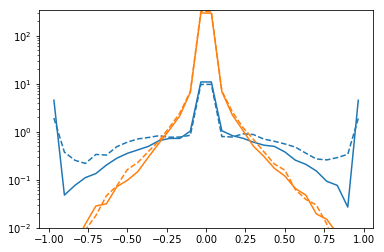

In [9]:
l=plt.plot(grid, urq_protons/widths)[0]
plt.plot(grid, sib_protons/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
l=plt.plot(grid, urq_pions/widths)[0]
plt.plot(grid, sib_pions/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
plt.ylim(1e-2,)
plt.semilogy()

(0, 7)

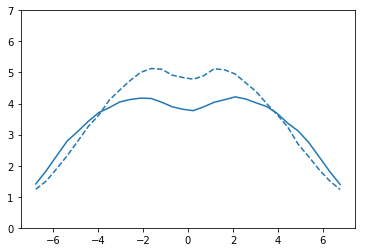

In [10]:
l=plt.plot(eta_grid, urq_charged_eta/wdths_eta)[0]
plt.plot(eta_grid, sib_charged_eta/wdths_eta,c=l.get_color(), ls='--',label='SIBYLL2.3c')
plt.ylim(0,7)
# plt.semilogy()

In [6]:
event_kinematics = EventKinematics(
    plab=1000. * GeV,
    p1pdg=2212,
    p2pdg=2212
#     nuc1_prop=(4,2),
#     nuc2_prop=(12,6)
)
generator.lib.options.ctoption[0] = 1

In [31]:
event_kinematics = EventKinematics(
    plab=5. * GeV,
#     p1pdg=2212,
#     p2pdg=2212
    nuc1_prop=(4,2),
    nuc2_prop=(12,6)
)
n_bins = 30
# bins = np.linspace(-1,1.,n_bins+1)
bins = np.logspace(-1,1,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
urq_pions = np.zeros(n_bins)
urq_protons = np.zeros(n_bins)

n_events = 1000
norm = 1./float(n_events)

for event in generator.event_generator(event_kinematics, n_events):
#     event.filter_final_state_charged()
    event.filter_final_state_charged()
    urq_protons += norm*np.histogram(event.en[event.pid== 2212],bins=bins)[0]
    urq_pions += norm*np.histogram(event.en[np.abs(event.pid == 211],bins=bins)[0]


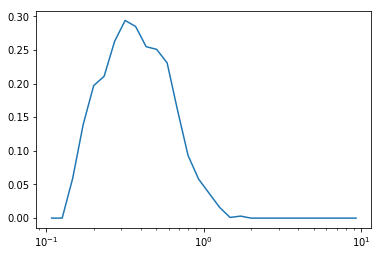

In [32]:
plt.semilogx(grid, urq_pions)
# plt.plot(grid, urq_protons)